In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Image Classification

In [2]:
X_train = np.load('Fashion_MNIST/X_train.npy')
y_train = np.load('Fashion_MNIST/y_train.npy')
X_test = np.load('Fashion_MNIST/X_test.npy')
y_test = np.load('Fashion_MNIST/y_test.npy')

In [3]:
label2cat = {0: 'T-shirt/top',
             1: 'Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'Bag',
             9: 'Ankle boot'}

'Ankle boot'

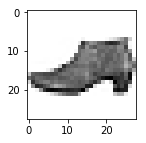

In [4]:
plt.figure(figsize=(2, 2))
i = np.random.randint(5000)
plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')
label2cat[y_train[i]]

Choose an algorithm that you think it would perform better than the others

Make a pipeline of `StandardScaler`, `PCA` and your classifier of choice. (logistic, knn, ...)

Train and evaluation your result by using `GridsearchCV` for finding the best parameters for your classifier.

# Save

Using Sklearn save the pipeline as benchmark for comparision later on our course

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import Pipeline

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=.95)),
         ('clf', LogisticRegression())]
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


TRAIN:
             precision    recall  f1-score   support

          0       0.84      0.88      0.86       457
          1       0.99      0.99      0.99       556
          2       0.81      0.79      0.80       504
          3       0.90      0.92      0.91       501
          4       0.78      0.84      0.81       488
          5       0.96      0.97      0.97       493
          6       0.76      0.66      0.70       493
          7       0.96      0.97      0.96       512
          8       0.98      0.99      0.98       490
          9       0.98      0.98      0.98       506

avg / total       0.90      0.90      0.90      5000

TEST:
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        20
          1       0.96      1.00      0.98        27
          2       0.81      0.78      0.79        27
          3       0.93      0.82      0.87        17
          4       0.83      0.71      0.77        21
          5       0.88      0

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
# saving
from sklearn.externals import joblib

In [16]:
joblib.dump(pipe_lr, "Fashion_class.pkl")

['Fashion_class.pkl']

In [17]:
from sklearn.model_selection import GridSearchCV

In [21]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('clf', LogisticRegression())]
pipe_lr = Pipeline(steps)

params = {"pca__n_components":[0.97],
          "clf__penalty":['l1', 'l2'],
          "clf__C":[0.85, 0.87, 0.9]}

gs_pipe_lr = GridSearchCV(pipe_lr, params, scoring='f1_macro', cv = 2, verbose=1)
gs_pipe_lr.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dua...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [0.97], 'clf__penalty': ['l1', 'l2'], 'clf__C': [0.85, 0.87, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [22]:
train_predictions = gs_pipe_lr.predict(X_train)
test_predictions = gs_pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


TRAIN:
             precision    recall  f1-score   support

          0       0.86      0.90      0.88       457
          1       0.99      0.99      0.99       556
          2       0.82      0.81      0.81       504
          3       0.91      0.94      0.92       501
          4       0.80      0.87      0.83       488
          5       0.98      1.00      0.99       493
          6       0.82      0.70      0.75       493
          7       0.99      0.98      0.98       512
          8       0.99      0.99      0.99       490
          9       0.99      0.99      0.99       506

avg / total       0.92      0.92      0.92      5000

TEST:
             precision    recall  f1-score   support

          0       0.90      0.90      0.90        20
          1       1.00      1.00      1.00        27
          2       0.92      0.89      0.91        27
          3       0.88      0.82      0.85        17
          4       0.84      0.76      0.80        21
          5       0.94      0

In [23]:
gs_pipe_lr.best_params_

{'clf__C': 0.87, 'clf__penalty': 'l1', 'pca__n_components': 0.97}

# Almost there! Next file is the last one.